# Abstract

Existing trend in recent years is growing business interest in Real-time location systems (RTLS). Indoor localization systems use numerous positioning approaches, which vary greatly in terms of cost, accuracy, technology, robustness, etc. Indoor localization requires a higher precision than the outdoor localization and is more challenging task because of the various object’s reflections and signal dispersion. In this project, we investigate the effect of removing an access point on the accuracy of an indoor positioning system developed by Nolan and Temple Lang (1). We also improve upon their location determination methods by implementing a weighted *k*-nearest neighbors model for position identification. Results show an improvement in location prediction when considering a different access point previously unused in the authors' analysis. Additionally, we find greater success using a weighted *k*-nearest neighbors approach for determining location.



# Introduction

Real-time location systems are a significant emerging technology that become a vital part of life (1). RTLS automatically track and identify the location of people or objects wirelessly. A classic RTLS example is location tracking of objects in a room. This RTLS application is called an indoor positioning system. Hardware such as bluetooth tags or cell phones are used as mobile beacons to communicate with strategically placed access points around the room. These beacons can be attached to people, other devices, and even robots. A beacon produces a signal that is read by the access points around the room. Each signal provides data used to determine the location of the mobile device within the room. Software applications utilizing triangulation, trilateration or a combination of location determination algorithms actively translate this location data and produce usable interfaces for people to identify the location of a beacon.

Applications for real-time location systems are vast and extend beyond a simple enclosed space. Advances in wireless technologies and proliferation of tracking tags have made real-time location systems ubiquitous in manufacturing, inventory management, and navigation (Winick 3). Identifying the current location of a package is a popular use of RTLS technology. Tracking previous location history and tracing locations to predict future locations are also common tasks. Additionally, active tags can provide critical data on the temperature of a package or the blood sugar level of a patient along with location information.

In this paper, we improve upon previous analysis by Nolan and Temple Lang (1) using indoor wireless signal strength data provided by Mannheim University. These data are generated from a single mobile device at 166 locations on one floor of a multi-story building. Eight orientation angles are considered at each location and 110 readings are taken for each (x,y) location, angle combination. For each reading, seven access points provide signal strength data to the mobile device. 

In their analysis, Nolan and Temple Lang implement an indoor positioning system using signal strength data and a mean-based *k*-nearest neighbors model. The model is used to predict the location of a mobile device using previously unseen signal strength data. The authors drop an access point from their training data set and use six of the seven access points for their *k*-nearest neighbors model. 

We investigate the accuracy of the authors' *k*-nearest neighbors model utilizing the access point previously not considered. We also extend their mean-based  *k*-nearest neighbors approach by implementing a weighted *k*-nearest neighbors model for predicting the location of previously unseen signal strength data.


# Litrature Review

Various reader and tag communication protcols are used depending on the technology employed with real-time location systems. For example, radio frequency identification (RFID) often employs ISO 18000, a universal protocol for different RFID frequencies (ISO 4). On the other hand, infrared line-of-sight systems often use affordable hardware and a protocol stack for short range communication (Barker, et al 5). These and other protocols along with associated hardware allow for location data to be passed through objects and provide for precise indoor location identification. 

The techniques used to analyze the position of the tags within each system can also vary. Communication protocols and associated data transmission methods impact analysis tasks for determining the location of a particular target. Though we utilize *k*-nearest neighbors in this paper, other location prediction methods frequently depend on wireless tag communication protocols (Boulos, et al 6). 

Bayesian methods have been implemented for location prediction (Madigan, et al 7). Location information is not necessary for training given prior knowledge about the nature of Wi-Fi signals. Thus, query times for prediction were reduced and location prediction proved much faster than traditional *k*-nearest neighbor methods.

To address inaccuracies and rough calibrations associated with common wireless location modeling, weighted least squares techniques have been developed to improve localization results (Tarrío, et al 8). These techniques outperform standard propogation channel modeling for multiple wireless network types. They also result in very limited overhead compared to standard methods associated with channel modeling and produce more accurate location results. 

At the Toronto University Health Network, a real-time location system allows the university to locate personnel and equipment entering a contaminated area. The real-time location system sends an alert if the person or equipment hasn't been decontaminated (Swedberg 9). Another example is a patent filed for tracking livestock that would assist ranchers and farmers in obtaining location information on their herds. This system utilizes the distance value transmitted from the reader and *k*-nearest neighbor analysis to determine location (Chung 10). In the defense industry, contractors assist in moving products from one location to another in their industrial processes to increase safety, efficiency and reduce human overhead (Hidalgo 11). 

Supporting hardware and communication protocols will continue to advance as businesses continue using real-time location systems to improve fulfillment requests with robotics and in warehouse distribution (Ding 12). An array of location determination algorithms currently exist. However, these algorithms are often dependent upon the scope and infrastructure deployment of the real-time location system. Consequently, there is currently no one-size-fits-all approach when it comes localization or location determination.


# Methods (incomplete)

In this project, we investigate the impact of Nolan and Temple Lang's decision to exclude an access point from their indoor positioning system. We also implement a weighted *k*-nearest neighbors and SKLEARN model and compare it to the mean-based *k*-nearest neighbors model they developed. Prior to discussing methods for accomplishing our two analysis objectives, we provide salient findings about the raw data and the transformations taken to prepare the data for analysis.





To prepare the training and test data sets for use in a *k*-nearest neighbors model, we aggregate records based on (x,y) position. Signal strengths from each access point for each position are mean-aggregated, forming a data set where each record is unique based on (x,y) position. Each position is associated with a vector of six signal strength values. 



<a id="top"></a>
# Table of Contents

* <a href="#importdata">Import Data</a>
    * Data Description
    * Data Prep
* <a href="#functions">Functions</a>    
    * explode - Steps in splitting data
    * process_raw_data - Convert URL into data frame
    * extract_signals - Pull the MACs with signals
    * split_dataset - Split data into testing training
    * compute_k_values - For elbow plots
    * plot_elbow - Plotting the elbows
    * calc_error - Calculate RMSE
    * plot_pred - Plot the predicted vs the known values
    * analyze - Model data with weighted method
    * compute_weights - Calculate the min and max weights
    * knn_predict - Modeling with the weighted data
    * evaluate_weighted_knn - Score the weighted models
    * report - Return the weights and RMSE for weighted models
* <a href="#dataprep">Data Preparations</a>    
* <a href="#EDA">Explortoary Data Analysis</a>   
    * Place Holder
    * Place Holder
* <a href="#macloc">Locating Same MAC Locations</a> 
    * Correlation Heat Map
    * Top MACs with Same Location
* <a href="#DataPrep">Data Prep for Modeling</a>
    * Selected MACs
    * Dealing with NULL values
    * Create Labels
* <a href="#bestfitknn">Determine Best K Value</a>       
    * Visualize Elbow Plots
    * Selection of K value
* <a href="#knnanalysis">KNN Analysis - Uniform</a>   
    * Analysis without MAC 00:0f:a3:39:dd:cd
    * Analysis without MAC 00:0f:a3:39:e1:c0
    * Analysis on combined MAC addresses data
    * Summary of KNN Uniform Method
* <a href="#KNNweight">KNN Analysis - Weighted</a>      
    * Analysis without MAC 00:0f:a3:39:dd:cd
    * Analysis without MAC 00:0f:a3:39:e1:c0
    * Analysis on combined MAC addresses data
    * Summary of KNN Weighted Method
* <a href="#online_offline">Find NN from Online to Offline</a>   
    * Results of NN
    * Summary

In [1]:
import pandas as pd
import numpy as np
import urllib.request
import seaborn as sns
from scipy import stats

from random import sample 
from io import StringIO
from timeit import default_timer as timer

from sklearn.neighbors import KNeighborsRegressor, NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt

<a href="#top">Back to Top</a>
<a id="importdata"></a>
# Import Data

In [2]:
#------------------------------------
#Access data set
#------------------------------------
url_offline = 'http://rdatasciencecases.org/Data/offline.final.trace.txt'
url_online = 'http://rdatasciencecases.org/Data/online.final.trace.txt'

file_offline = urllib.request.urlopen(url_offline)
raw_lines_offline = file_offline.readlines()

file_online = urllib.request.urlopen(url_online)
raw_lines_online = file_online.readlines()

<a href="#top">Back to Top</a>
<a id="functions"></a>
# Functions

In [3]:
#------------------------------------
#Function to split position and signal, freq, and mode
#------------------------------------
def explode(cols, values_str, pref=''):
    values = values_str.split(',')
    pref_cols = ['{}_{}'.format(pref, c) for c in cols]
    
    return zip(pref_cols, values)

In [4]:
def process_raw_data(raw_lines):
    lines = []
    fixed_col_names = ['t', 'id', 'pos', 'degree']

    for line in raw_lines:
        line = line.decode("utf-8").strip()

        rec = {}
        for data in line.split(';'):
            if data.startswith('#'):
                # Can't be parsed, go to next line
                continue

            # Split the pair into name and value, then turn name to lower case
            name, value = data.split('=')
            name = name.lower()

            if name == 'pos':
                # POS entities: x, y, z
                pos_cols = ['x', 'y', 'z']
                for k,v in explode(pos_cols, value, name):
                    rec[k] = v

            elif name in fixed_col_names:
                rec[name] = value

            else:
                # For MAC entities: signal, freq, mode
                mac_cols = ['sig', 'freq', 'mode']
                for k,v in explode(mac_cols, value, name):
                    rec[k] = v

        lines.append(rec)

    #------------------------------------
    #Create data frames 
    #------------------------------------    
    df_orig = pd.DataFrame(lines)
    
    return df_orig

In [5]:
def extract_signals(df):
    
    #build data frame with position and mac addresses
    df_signals = df[['pos_x', 'pos_y'] + sig_cols]
    
    #treat data as float
    df_signals = df_signals.astype(np.float)
    
    # Combine the pos
    pos = df[['pos_x', 'pos_y']].astype(str)
    df_signals['pos'] = pos.pos_x + '_' + pos.pos_y

    #clean up on the data
    return df_signals.dropna(how='all')

In [6]:
def split_dataset(df, exclude_mac=None):
    drop_cols = label_cols + ['pos']
    
    # If a mac is given, add to the col to drop
    if exclude_mac:
        drop_cols.append(exclude_mac)
     
    X = df.drop(drop_cols, axis=1).values   
    #X = df_pruned.drop(drop_cols, axis=1).values
    
    # Split train and test for MAC: 00:0f:a3:39:e1:c0
    return train_test_split(X, y, test_size=0.2)

In [7]:
def compute_k_values(X_train, y_train, X_test, y_test, num_k=30):
    error_rate = []

    for i in range(1, num_k):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, y_train)
        
        pred_i = knn.predict(X_test)
        error_rate.append(np.mean(pred_i != y_test))
        
    return error_rate

In [8]:
def plot_elbow(error_rate, title, num_k=30):
    plt.figure(figsize=(10,6))
    
    plt.plot(range(1, num_k)
             ,error_rate
             ,color='blue'
             ,linestyle='dashed'
             ,marker='o'
             ,markerfacecolor='red'
             ,markersize=10)
    
    plt.title(title)
    plt.xlabel('K')
    plt.ylabel('Error Rate')

In [9]:
def calc_error(y_true, y_pred):
    return np.sqrt( mean_squared_error(y_true, y_pred) )

In [10]:
def plot_pred(y_true, y_pred, title='', n_points=100):
    idx = sample(range(len(y_true)), n_points)
    plt.scatter(y_true[idx, 0], y_true[idx, 1], label='True')
    plt.scatter(y_pred[idx, 0], y_pred[idx, 1], label='Prediction')
    
    plt.title(title)
    plt.legend()
    plt.show()

In [11]:
"""
def analyze(X, y, exclude_mac, title=''):
    # Split train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    X_train.shape, X_test.shape
    
    # KNN model
    knn_reg = KNeighborsRegressor(n_neighbors=k, weights='uniform')
    
    # Fit model
    knn_reg.fit(X_train, y_train)
    
    # Predict
    y_pred = knn_reg.predict(X_test)
    
    # Evaluate model on test data
    rmse = calc_error(y_test, y_pred)
    
    plot_pred(y_test, y_pred, title)
    
    return rmse
"""

def analyze(X_train, X_test, y_train, y_test, title=''):
    # Split train and test sets
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    #X_train.shape, X_test.shape
    
    # KNN model
    knn_reg = KNeighborsRegressor(n_neighbors=k, weights='uniform')
    
    # Fit model
    knn_reg.fit(X_train, y_train)
    
    # Predict
    y_pred = knn_reg.predict(X_test)
    
    # Evaluate model on test data
    rmse = calc_error(y_test, y_pred)
    
    plot_pred(y_test, y_pred, title)
    
    return rmse


In [12]:
def compute_weights(distances, n_labels=2):
    eps = 1e-9
    # Find the inverse
    inv_dist = 1 / (distances+eps)

    # Normalize inv dist
    weights = inv_dist / inv_dist.sum()
    weights = np.expand_dims(weights, axis=2)
    weights = np.repeat(weights, n_labels, axis=2)
    
    return weights

In [13]:
def knn_predict(model, X_test, y_train):
    # Predict the nn
    distances, indices = model.kneighbors(X_test)
    
    # Mask out the labels for the nn, using the indices
    y_pred_k = y_train[indices]
    
    # Compute weights with the distances
    weights_xy = compute_weights(distances)
    weights_range = (weights_xy.min(), weights_xy.max())
    
    # Apply the weight for averaging
    y_pred_weighted = np.average(y_pred_k, axis=1, weights=weights_xy)
    
    return y_pred_weighted, weights_range

In [14]:
"""
def evaluate_weighted_knn(k, exclude_mac=None, title=''):
    knn = NearestNeighbors(n_neighbors=k)
    
    #df for modeling, mac that you want to exclude
    X_train, X_test, y_train, y_test = split_dataset(df_pruned, exclude_mac=exclude_mac)
    
    # Fit on train set
    knn.fit(X_train, y_train)
    
    # Predict the labels
    y_pred_weighted, weights_range = knn_predict(knn, X_test, y_train)
    print('Weights range:', weights_range)
    
    #calculate root mean square error
    rmse_wgt = calc_error(y_test, y_pred_weighted)
    print('Weighted RMSE:', rmse_wgt)

    #plot true vs predicted
    plot_pred(y_test, y_pred_weighted, title, n_points=100)
    
    return {
        'rmse': rmse_wgt, 
        'weight_range': weights_range
    }
"""

def evaluate_weighted_knn(X_train, X_test, y_train, y_test, k, title=''):
    knn = NearestNeighbors(n_neighbors=k)
    
    #df for modeling, mac that you want to exclude
    #X_train, X_test, y_train, y_test = split_dataset(df_pruned, exclude_mac=exclude_mac)
    
    # Fit on train set
    knn.fit(X_train, y_train)
    
    # Predict the labels
    y_pred_weighted, weights_range = knn_predict(knn, X_test, y_train)
    print('Weights range:', weights_range)
    
    #calculate root mean square error
    rmse_wgt = calc_error(y_test, y_pred_weighted)
    print('Weighted RMSE:', rmse_wgt)

    #plot true vs predicted
    plot_pred(y_test, y_pred_weighted, title, n_points=100)
    
    return {
        'rmse': rmse_wgt, 
        'weight_range': weights_range
    }

In [15]:
def report(rmse_wgt, mac):
    rmse =  round(rmse_wgt['rmse'], 2)
    print('RMSE for {}: {}'.format(mac, rmse) )
    print('Weights range for {}: {}'.format(mac, rmse_wgt['weight_range']) )
    print()

In [16]:
def qqplot(x, y, **kwargs):
    _, xr = stats.probplot(x, fit=False)
    _, yr = stats.probplot(y, fit=False)
    plt.scatter(xr, yr, **kwargs)

In [17]:
def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y)
    ax.set_xlabel('Position X')
    ax.set_ylabel('Position Y')

    # now determine nice limits by hand:
    binwidth = .5
    xmax = np.max(np.abs(x))
    ymax = np.max(np.abs(y))
    limx = (int(xmax/binwidth) + 1) * binwidth
    limy = (int(ymax/binwidth) + 1) * binwidth

    binsx = np.arange(-binwidth, limx + binwidth, binwidth)
    binsy = np.arange(-binwidth, limy + binwidth, binwidth)
    ax_histx.hist(x, bins=binsx)
    ax_histy.hist(y, bins=binsy, orientation='horizontal')

#### End of Functions

### Data into Data Frames

In [18]:
#get the data into data frames
df_orig_offline = process_raw_data(raw_lines_offline)
df_orig_online = process_raw_data(raw_lines_online)

print("# of Rows df_orig_offline: ", df_orig_offline.shape[0])
print("# of Columns df_orig_offline: ", df_orig_offline.shape[1])
print("")
print("# of Rows df_orig_online: ", df_orig_online.shape[0])
print("# of Columns df_orig_online: ", df_orig_online.shape[1])

# of Rows df_orig_offline:  151392
# of Columns df_orig_offline:  69

# of Rows df_orig_online:  6832
# of Columns df_orig_online:  48


# None Values

In [19]:
#number of missing data for each signal
sig_cols = [c for c in df_orig_offline.columns if c.endswith('sig')]
for col in sig_cols:
    print(col, sum(df_orig_offline[col].isnull()))

00:14:bf:b1:97:8a_sig 29730
00:14:bf:b1:97:90_sig 32009
00:0f:a3:39:e1:c0_sig 5614
00:14:bf:b1:97:8d_sig 33781
00:14:bf:b1:97:81_sig 33890
00:14:bf:3b:c7:c6_sig 30622
00:0f:a3:39:dd:cd_sig 7141
00:0f:a3:39:e0:4b_sig 110979
00:0f:a3:39:e2:10_sig 134232
02:64:fb:68:52:e6_sig 102356
02:00:42:55:31:00_sig 48279
00:04:0e:5c:23:fc_sig 151265
00:30:bd:f8:7f:c5_sig 151114
00:e0:63:82:8b:a9_sig 151297
02:37:fd:3b:54:b5_sig 142781
02:2e:58:22:f1:ac_sig 126531
02:42:1c:4e:b5:c0_sig 151391
02:0a:3d:06:94:88_sig 151391
02:5c:e0:50:49:de_sig 144459
02:4f:99:43:30:cd_sig 151391
02:b7:00:bb:a9:35_sig 143801


In [20]:
#number of missing data for each signal
sig_cols2 = [c for c in df_orig_online.columns if c.endswith('sig')]
for col in sig_cols2:
    print(col, sum(df_orig_online[col].isnull()))

00:14:bf:b1:97:8a_sig 1449
00:0f:a3:39:e1:c0_sig 275
00:14:bf:3b:c7:c6_sig 1475
00:14:bf:b1:97:81_sig 1591
00:14:bf:b1:97:8d_sig 1535
00:14:bf:b1:97:90_sig 1416
00:0f:a3:39:e0:4b_sig 5208
00:0f:a3:39:e2:10_sig 6203
00:0f:a3:39:dd:cd_sig 303
02:64:fb:68:52:e6_sig 5172
02:00:42:55:31:00_sig 1840
00:04:0e:5c:23:fc_sig 6830
02:a3:c5:af:6c:21_sig 4241
02:b7:00:bb:a9:35_sig 6747


In [21]:
#how much is it sorted by time?
sum(df_orig_offline['t']>df_orig_offline['t'].shift(1))

144752

In [22]:
#how much is it sorted by time?
sum(df_orig_online['t']>df_orig_online['t'].shift(1))

6532

<a href="#top">Back to Top</a>
<a id="dataprep"></a>
# Data Prep

The data set orginates from http://rdatasciencecases.org/Data/offline.final.trace.txt

Each line of data represent a time in which the measurements were recorded.  Multiple MACs are recorded at the same time which shows in the data.
Lines with '#' are non-essential and will be skipped when reading the data.  

The data is seperated by ';' for the time, id, position, degree, MAC.  
* Within the position feature this can be furthur broken down into position X / Y / Z components  
    * example: pos=0.0,0.0,0.0
    * The values seperated by the ',' are in X, Y, Z in that order
* Feature MAC can be broken down into signal, frequency, and mode components
    * example: 00:14:bf:b1:97:90=-56,2427000000,3
    * For this particualr MAC values are seperated by ',' are in signal, frequency, and mode in that order
        * mode 3 = Access Point
        * mode 1 = Adhoc

For better use of the data each MAC will have 3 columns:
* 00:14:bf:b1:97:90_sig
* 00:14:bf:b1:97:90_freq
* 00:14:bf:b1:97:90_mode

The values within these columns represent the signal, frequency, and mode for that particular MAC.  The position, time, and ID columns are then appended to the MAC columns.


The end results of our data prep allows for table which contains:
* Pos_x
* Pos_y
* Pos_z
* t
* id
* degree
* The MAC features for sig (signal)
* The MAC features for mode 
* The MAC features for freq (frequency) 

<a href="#top">Back to Top</a>
<a id="EDA"></a>
# EDA portion

In [23]:
# create blank df to append to
df_eda = pd.DataFrame(columns=['t', 'id', 'pos_x', 'pos_y', 'pos_z', 'degree', 'sig', 'freq', 'mode', 'mac'])

# list of all MAC addresses
mac_addresses = [
    '00:0f:a3:39:e1:c0',
    '00:0f:a3:39:dd:cd',
    '00:14:bf:b1:97:8a',
    '00:14:bf:3b:c7:c6',
    '00:14:bf:b1:97:90',
    '00:14:bf:b1:97:8d',
    '00:14:bf:b1:97:81'
]

i = 0

while i < len(mac_addresses):
    # match column names for desired mac and feature
    tempsig = str(mac_addresses[i]+'_sig')
    tempfreq = str(mac_addresses[i]+'_freq')
    tempmode = str(mac_addresses[i]+'_mode')
    
    # select only columns of given mac
    temp_df = df_orig_offline[['t', 'id', 'pos_x', 'pos_y', 'pos_z', 'degree', tempsig, tempfreq, tempmode]]
    
    # rename columns to be able to append
    temp_df.columns =['t', 'id', 'pos_x', 'pos_y', 'pos_z', 'degree', 'sig', 'freq', 'mode']
    
    # drop any rows with NaN values
    temp_df = temp_df.dropna(how='any')
    
    # add mac address as column
    temp_df['mac'] = str(mac_addresses[i])
    
    # append to new df
    df_eda = df_eda.append(temp_df, ignore_index=True)
    
    i+=1
    
# check for nulls
print(df_eda.isnull().sum(axis = 0))

print('============================')

# check for dtypes and more
print(df_eda.info())

t         0
id        0
pos_x     0
pos_y     0
pos_z     0
degree    0
sig       0
freq      0
mode      0
mac       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886957 entries, 0 to 886956
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   t       886957 non-null  object
 1   id      886957 non-null  object
 2   pos_x   886957 non-null  object
 3   pos_y   886957 non-null  object
 4   pos_z   886957 non-null  object
 5   degree  886957 non-null  object
 6   sig     886957 non-null  object
 7   freq    886957 non-null  object
 8   mode    886957 non-null  object
 9   mac     886957 non-null  object
dtypes: object(10)
memory usage: 67.7+ MB
None


In [24]:
# need to convert respective objects to floats
df_eda[['t', 'pos_x', 'pos_y', 'pos_z', 'degree', 'sig', 'freq', 'mode']] = df_eda[['t', 'pos_x', 'pos_y', 'pos_z', 'degree', 'sig', 'freq', 'mode']].apply(pd.to_numeric)

df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886957 entries, 0 to 886956
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   t       886957 non-null  int64  
 1   id      886957 non-null  object 
 2   pos_x   886957 non-null  float64
 3   pos_y   886957 non-null  float64
 4   pos_z   886957 non-null  float64
 5   degree  886957 non-null  float64
 6   sig     886957 non-null  int64  
 7   freq    886957 non-null  int64  
 8   mode    886957 non-null  int64  
 9   mac     886957 non-null  object 
dtypes: float64(4), int64(4), object(2)
memory usage: 67.7+ MB


In [25]:
print('Position Z unique values: ', df_eda.pos_z.unique())
print('===============================')
print('Mode unique values: ', df_eda['mode'].unique())
print('===============================')
print('Frequency for Mac 00:0f:a3:39:e1:c0: ', (df_eda.loc[df_eda['mac'] == '00:0f:a3:39:e1:c0']).freq.unique())

# frequency is mac specific, pos_z = 0, and mode = 3
# as a result, we drop those columns

df_eda = df_eda.drop(columns=['pos_z', 'freq', 'mode'])

Position Z unique values:  [0.]
Mode unique values:  [3]
Frequency for Mac 00:0f:a3:39:e1:c0:  [2462000000]


In [26]:
df_grouped = df_eda.groupby(by=['mac'])
 
print(df_eda.groupby('mac')['t'].nunique())

mac
00:0f:a3:39:dd:cd    144251
00:0f:a3:39:e1:c0    145778
00:14:bf:3b:c7:c6    120770
00:14:bf:b1:97:81    117502
00:14:bf:b1:97:8a    121662
00:14:bf:b1:97:8d    117611
00:14:bf:b1:97:90    119383
Name: t, dtype: int64


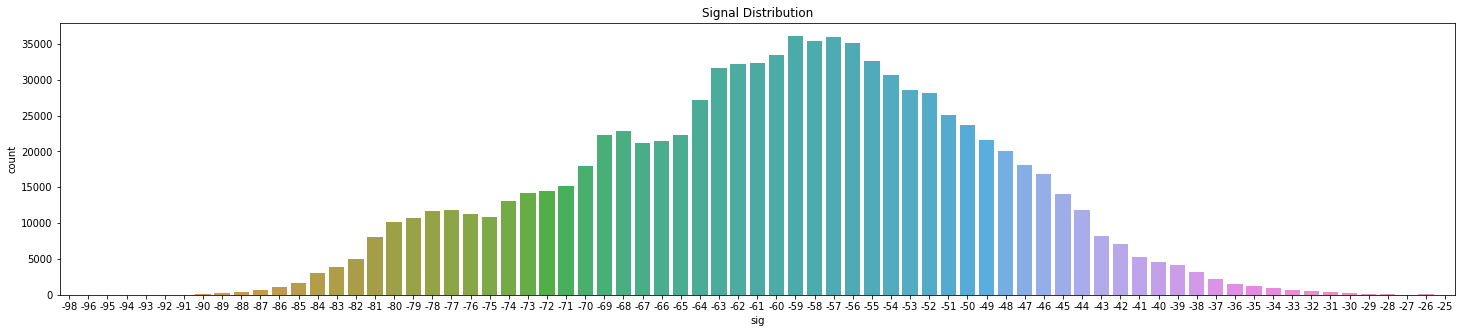

In [27]:
plt.figure(figsize=(25,5))
sns.countplot(x="sig", data=df_eda)
plt.title("Signal Distribution")
plt.show()

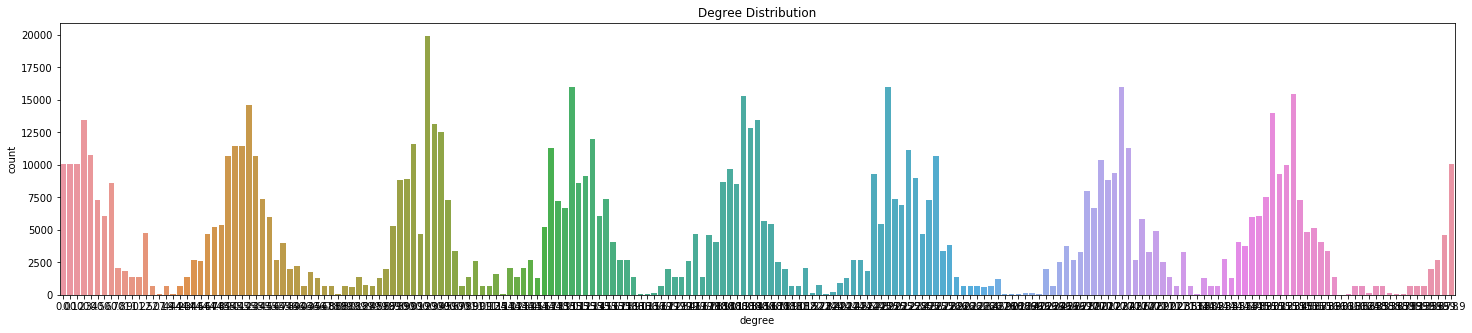

In [28]:
plt.figure(figsize=(25,5))
sns.countplot(x="degree", data=df_eda)
plt.title("Degree Distribution")
plt.show()

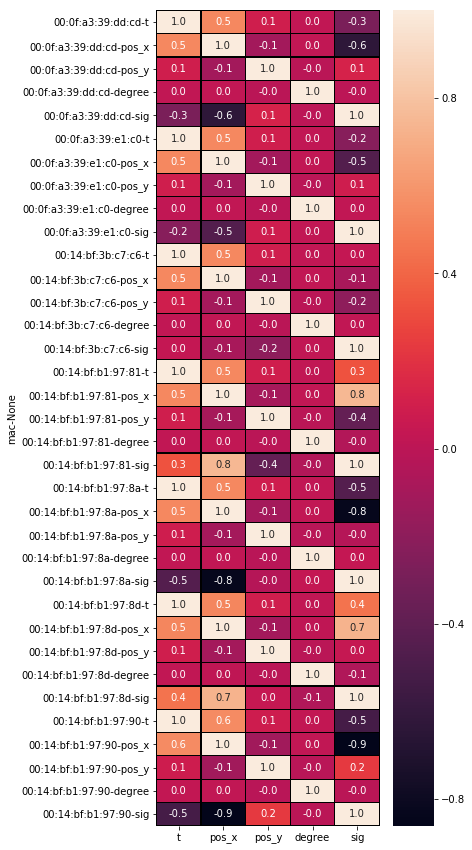

In [29]:
f,ax=plt.subplots(figsize=(5,15))
sns.heatmap(df_grouped.corr(),annot=True,linewidths=0.1,linecolor="black",fmt=".1f",ax=ax)
plt.show()

# areas of interest are pos_x and sig
# there is slight correlation between position and signal strength

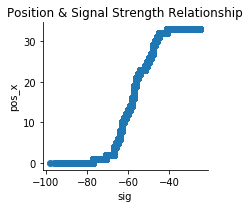

In [30]:
g = sns.FacetGrid(df_eda).set(title = 'Position & Signal Strength Relationship', xlabel = 'Position X', ylabel = 'Signal')
g.map(qqplot, "sig", "pos_x")
g.add_legend()

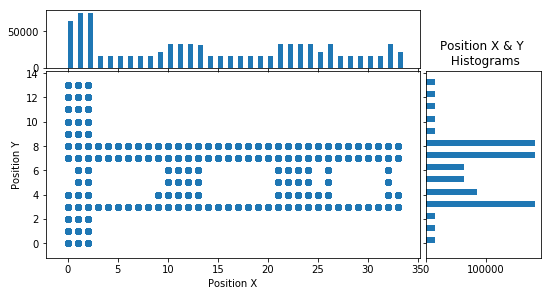

In [31]:
x = df_eda['pos_x']
y = df_eda['pos_y']

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.01

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# figure size
fig = plt.figure(figsize=(8, 4))

# create plots axes
ax = fig.add_axes(rect_scatter)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

# use the previously defined function
scatter_hist(x, y, ax, ax_histx, ax_histy)

plt.title("Position X & Y \n Histograms")
plt.show()

#sourced from: https://matplotlib.org/devdocs/gallery/lines_bars_and_markers/scatter_hist.html

[Text(0, 0.5, 'Position X'),
 Text(0.5, 0, 'Signal Strength'),
 Text(0.5, 1.0, 'Position & Signal Strength Box Plot')]

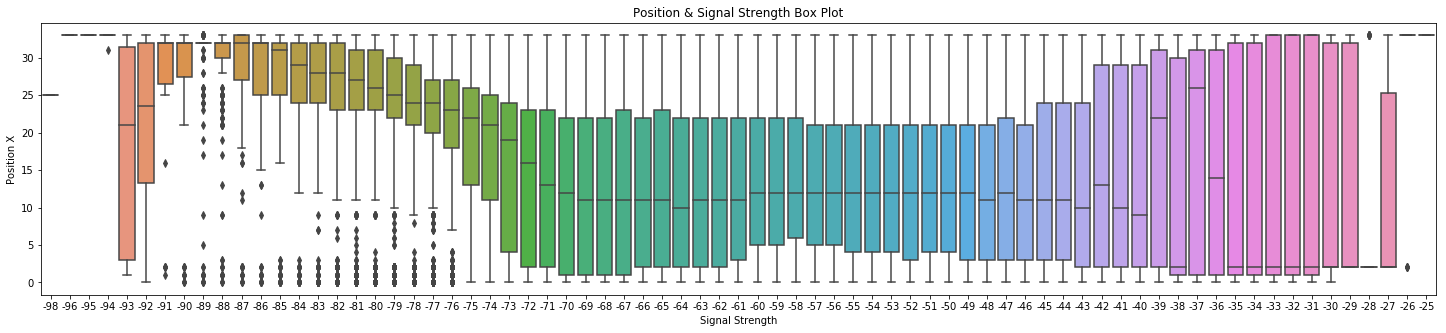

In [32]:
plt.figure(figsize=(25,5))
sns.boxplot(x="sig", y="pos_x", data=df_eda).set(title = 'Position & Signal Strength Box Plot', xlabel = 'Signal Strength', ylabel = 'Position X')

In [33]:
pd.cut(df_eda['degree'], bins=8).value_counts()

(89.975, 134.962]     122284
(269.925, 314.912]    114215
(179.95, 224.938]     112900
(-0.36, 44.988]       111734
(44.988, 89.975]      109815
(224.938, 269.925]    109614
(314.912, 359.9]      106728
(134.962, 179.95]      99667
Name: degree, dtype: int64

In [34]:
pd.cut(df_eda['sig'], bins=8).value_counts()

(-61.5, -52.375]      300405
(-70.625, -61.5]      219204
(-52.375, -43.25]     179285
(-79.75, -70.625]     113411
(-43.25, -34.125]      37382
(-88.875, -79.75]      33925
(-34.125, -25.0]        3027
(-98.073, -88.875]       318
Name: sig, dtype: int64

In [35]:
df_eda.sig.describe()

count    886957.000000
mean        -59.908353
std          10.392331
min         -98.000000
25%         -67.000000
50%         -59.000000
75%         -53.000000
max         -25.000000
Name: sig, dtype: float64

In [36]:
bin_labels = ['-98 - -88.875', '-88.875 - -79.75', '-79.75 - -70.625', '-70.625 - -61.5', '-61.5 - -52.375', '-52.375 - -43.25', '-43.25 - -34.125', '-34.125 - -25']
cut_bins = [-99, -88.875, -79.75, -70.625, -61.5, -52.375, -43.25, -34.125, -25]
df_eda['sig_bin'] = pd.cut(df_eda['sig'], bins=cut_bins, labels=bin_labels)
df_eda

,t,id,pos_x,pos_y,degree,sig,mac,sig_bin
0,1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,-53,00:0f:a3:39:e1:c0,-61.5 - -52.375
1,1139643118744,00:02:2D:21:0F:33,0.0,0.0,0.0,-54,00:0f:a3:39:e1:c0,-61.5 - -52.375
2,1139643119002,00:02:2D:21:0F:33,0.0,0.0,0.0,-54,00:0f:a3:39:e1:c0,-61.5 - -52.375
3,1139643119263,00:02:2D:21:0F:33,0.0,0.0,0.0,-54,00:0f:a3:39:e1:c0,-61.5 - -52.375
4,1139643119538,00:02:2D:21:0F:33,0.0,0.0,0.0,-55,00:0f:a3:39:e1:c0,-61.5 - -52.375
...,...,...,...,...,...,...,...,...
886952,1141936869196,00:02:2D:21:0F:33,20.0,8.0,315.7,-60,00:14:bf:b1:97:81,-61.5 - -52.375
886953,1141936869700,00:02:2D:21:0F:33,20.0,8.0,315.7,-58,00:14:bf:b1:97:81,-61.5 - -52.375
886954,1141936869952,00:02:2D:21:0F:33,20.0,8.0,315.7,-62,00:14:bf:b1:97:81,-70.625 - -61.5
886955,1141936870204,00:02:2D:21:0F:33,20.0,8.0,315.7,-60,00:14:bf:b1:97:81,-61.5 - -52.375


[Text(0, 0.5, 'Position X'),
 Text(0.5, 0, 'Signal Bin'),
 Text(0.5, 1.0, 'Position & Signal Strength Bins Box Plot by Mac Address')]

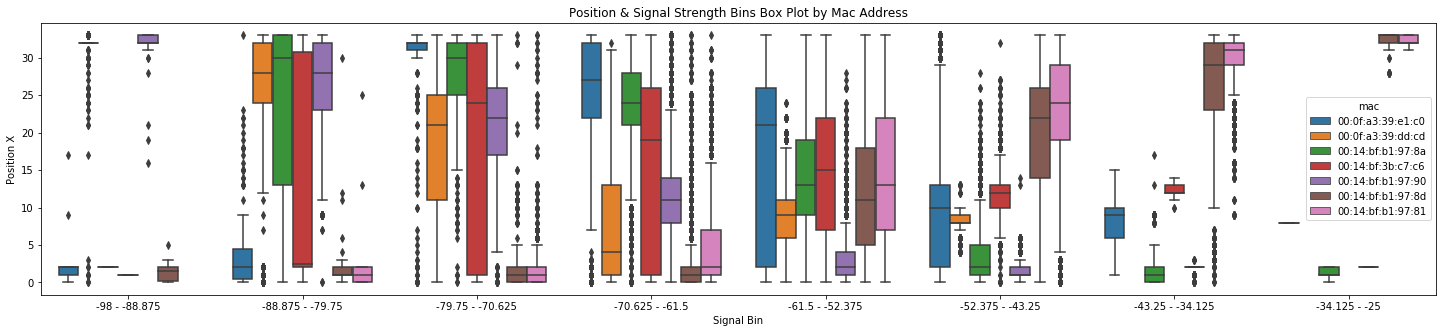

In [37]:
plt.figure(figsize=(25,5))
sns.boxplot(x="sig_bin", y="pos_x", data=df_eda, hue = 'mac').set(title = 'Position & Signal Strength Bins Box Plot by Mac Address', xlabel = 'Signal Bin', ylabel = 'Position X')

[Text(0, 0.5, 'Position X'),
 Text(0.5, 0, 'Signal Bin'),
 Text(0.5, 1.0, 'Position & Signal Strength Bins Box Plot')]

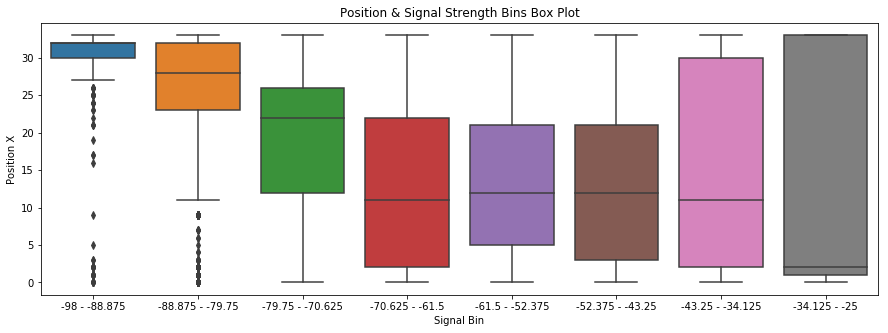

In [38]:
plt.figure(figsize=(15,5))
sns.boxplot(x="sig_bin", y="pos_x", data=df_eda).set(title = 'Position & Signal Strength Bins Box Plot', xlabel = 'Signal Bin', ylabel = 'Position X')

In [39]:
bin_labels = ['0 - 44.9', '45 - 89.9', '90 - 134.9', '135 - 179.9', '180 - 224.9', '225 - 269.9', '270 - 314.9', '315 - 359.9']
cut_bins = [-1, 45, 90, 135, 180, 225, 270, 315, 360]
df_eda['degree_bin'] = pd.cut(df_eda['degree'], bins=cut_bins, labels=bin_labels)
df_eda

,t,id,pos_x,pos_y,degree,sig,mac,sig_bin,degree_bin
0,1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,-53,00:0f:a3:39:e1:c0,-61.5 - -52.375,0 - 44.9
1,1139643118744,00:02:2D:21:0F:33,0.0,0.0,0.0,-54,00:0f:a3:39:e1:c0,-61.5 - -52.375,0 - 44.9
2,1139643119002,00:02:2D:21:0F:33,0.0,0.0,0.0,-54,00:0f:a3:39:e1:c0,-61.5 - -52.375,0 - 44.9
3,1139643119263,00:02:2D:21:0F:33,0.0,0.0,0.0,-54,00:0f:a3:39:e1:c0,-61.5 - -52.375,0 - 44.9
4,1139643119538,00:02:2D:21:0F:33,0.0,0.0,0.0,-55,00:0f:a3:39:e1:c0,-61.5 - -52.375,0 - 44.9
...,...,...,...,...,...,...,...,...,...
886952,1141936869196,00:02:2D:21:0F:33,20.0,8.0,315.7,-60,00:14:bf:b1:97:81,-61.5 - -52.375,315 - 359.9
886953,1141936869700,00:02:2D:21:0F:33,20.0,8.0,315.7,-58,00:14:bf:b1:97:81,-61.5 - -52.375,315 - 359.9
886954,1141936869952,00:02:2D:21:0F:33,20.0,8.0,315.7,-62,00:14:bf:b1:97:81,-70.625 - -61.5,315 - 359.9
886955,1141936870204,00:02:2D:21:0F:33,20.0,8.0,315.7,-60,00:14:bf:b1:97:81,-61.5 - -52.375,315 - 359.9


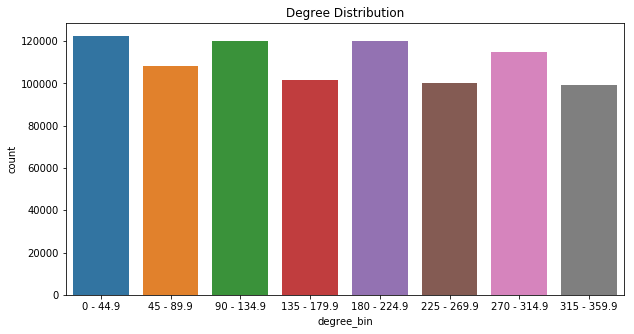

In [40]:
plt.figure(figsize=(10,5))
sns.countplot(x="degree_bin", data=df_eda)
plt.title("Degree Distribution")
plt.show()


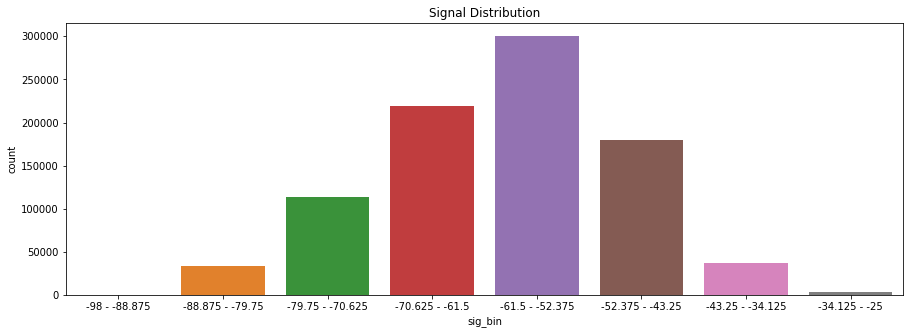

In [41]:
plt.figure(figsize=(15,5))
sns.countplot(x="sig_bin", data=df_eda)
plt.title("Signal Distribution")
plt.show()

<Figure size 1080x360 with 0 Axes>

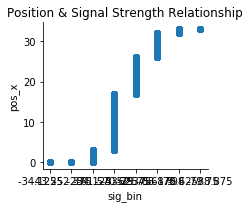

In [42]:
plt.figure(figsize=(15,5))
g = sns.FacetGrid(df_eda).set(title = 'Position & Signal Strength Relationship', xlabel = 'Position X', ylabel = 'Signal')
g.map(qqplot, "sig_bin", "pos_x")
g.add_legend()

<a href="#top">Back to Top</a>
<a id="macloc"></a>
# Find the MACs with same locations

To determine which MACs to use for analysis the team found macs with the highest correlation  This indicates that the MACs would have the same locations.

To do this the team built a new data frame to conduct the correlation analysis.  From the 'df_orig' data frame we find all features with the suffix of 'sig'.  We then append these features along to the columns 'pos_x' and 'pos_y' columns.  With this new data frame we are able to get the means of the data and group it by 'pos_x' and 'pos_y'.

In inital plotting of the data we found that there is too much noise to determine which MACs to use.  We also found false positive correlations due to the data having many NaN values, which were correlating to each other.  in order to overcome this issue and reduce the number of features for correlation during the 'drop.na' step we used the 'thresh'.  This options allows us to say X amount of NaN to keep.  As we increased this value the number of features dropped to eight for correlation.

In [43]:
#get all columns with signals
sig_cols = [c for c in df_orig_offline.columns if c.endswith('sig')]
#print(sig_cols)

#Combine position and signal columns
df_pos_sig = df_orig_offline[['pos_x', 'pos_y']+sig_cols].astype(np.float)

#Get the means of position X & Y
pos_grouped = df_pos_sig.groupby(['pos_x', 'pos_y']).mean()

#Filter the data to remove columns with NaN values
#NaN they correlate to each other and create false positives
filtered = pos_grouped.dropna(thresh=166, axis=1)

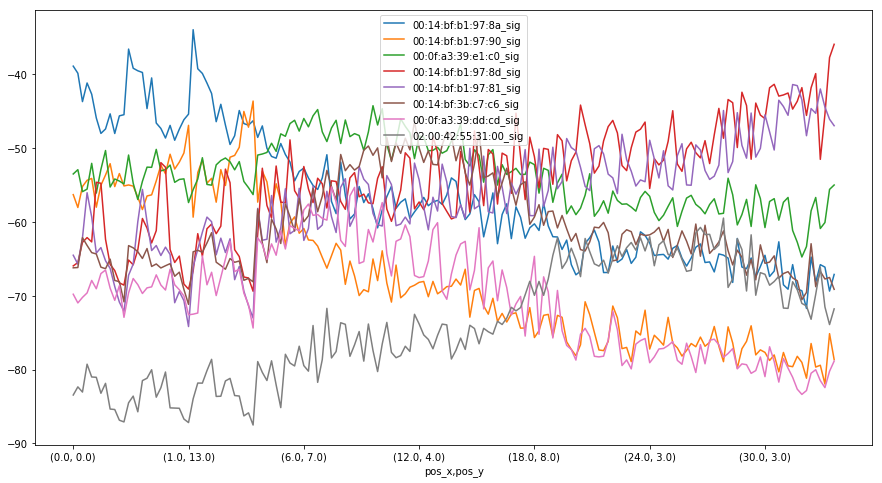

In [44]:
#Plot potential similar MACs
filtered.plot(figsize=(15, 8))

<a href="#top">Back to Top</a>
## Correlation Heat Map

To look for high correlation the team implemented a correlation heat map.  The lighter colors represent high correlation whereas the darker colors represent lower correlation.  This was just a visual representation for analysis it was deemed to extract the actual MACs to use for analysis.

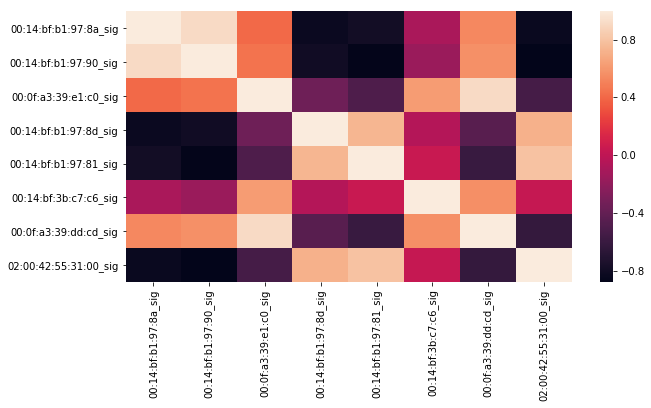

In [45]:
#Create Correlation Matrix on filtered set
corr = filtered.corr()

#Plot correlation Heat map
plt.figure(figsize=(10, 5))
sns.heatmap(corr)

<a href="#top">Back to Top</a>
## Top MACs with Same Location

To extract the highest correlation MACs we created a mask object that allowed us to filter MACs that ranged between a certain correlation.  For this analysis we pulled any MACs with a correlation factor higher than 0.9.  These indicated the MACs with the same location and should be used for analysis.

In [46]:
#Reduce MACs even more by showing correaltions between certain %
mask = (corr >= 0.9) & (corr < 1.0)

#Push the MACs to a list
corr_masked = corr[mask]
cols = corr_masked.stack().reset_index()['level_0'].tolist()

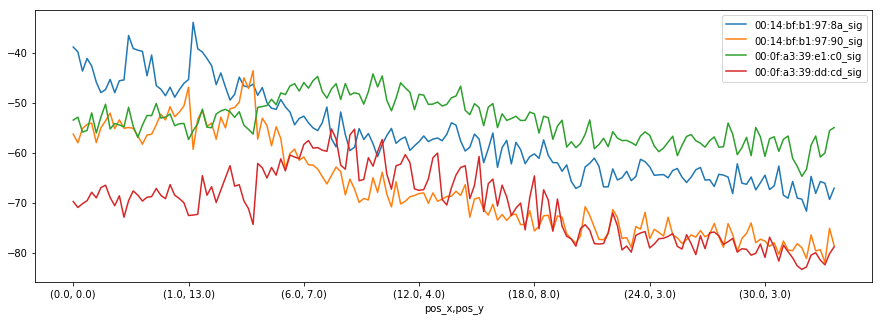

In [47]:
#Plot top similar MACs
filtered[cols].plot(figsize=(15, 5))

In [48]:
print('MAC pairs for investigation with 0.9+ correlation')
print('')      
print('MAC pairs 1: ',cols[0:2])
print('MAC pairs 2: ',cols[2:4])

MAC pairs for investigation with 0.9+ correlation

MAC pairs 1:  ['00:14:bf:b1:97:8a_sig', '00:14:bf:b1:97:90_sig']
MAC pairs 2:  ['00:0f:a3:39:e1:c0_sig', '00:0f:a3:39:dd:cd_sig']


<a href="#top">Back to Top</a>
<a id="DataPrep"></a>
# Data Prep for Modeling

For modeling purpose we need to get to the features that are necessary.  It is was thought to create a process to use all signal features for later analysis if needed.  From the analysis in determing which MACs to use we will focus on the following:
* '00:0f:a3:39:dd:cd', '00:0f:a3:39:e1:c0'

We furthur limit our features to only MACs that are an access point which is indicated by 3 in the *_mode columns.  Due to the method in which the data was read into the pandas data frame, all values are object.  Prior to moving forward we are able to convert necessary features to a float type. 

In [49]:
#MACs of Interest
select_macs = [
    '00:0f:a3:39:e1:c0',
    '00:0f:a3:39:dd:cd',
    '00:14:bf:b1:97:8a',
    '00:14:bf:3b:c7:c6',
    '00:14:bf:b1:97:90',
    '00:14:bf:b1:97:8d',
    '00:14:bf:b1:97:81'
]

sig_cols = [c + '_sig' for c in select_macs]

#Create data frame with pos and selected MACs
df_data_train = extract_signals(df_orig_offline)
df_data_test = extract_signals(df_orig_online)

## Dealing with NULL values

### Determine % of Missing Values

After identfyin the MACs for use in analysis we need to address any missing values if found.  The table below indicates that are highest percentage of missing values is 1.25%.  Considering the data set has 98.75% of all values filled in the team decided in fill the missing values with 0.

### % Columns of NULL Values

In [50]:
#Sum the number of NaN in each column for offline data
df_nacount_train = pd.DataFrame(df_data_train.isnull().sum(axis = 0))

#Rename the count column
df_nacount_train.rename(columns={0: 'NaN Counts'},inplace=True)

#Create additional calcs
df_nacount_train['Total Row Count'] = df_data_train.shape[0]
df_nacount_train['% Missing'] = round(df_nacount_train['NaN Counts'] / df_data_train.shape[0] * 100 , 2)

df_nacount_train

,NaN Counts,Total Row Count,% Missing
pos_x,5312,151392,3.51
pos_y,5312,151392,3.51
00:0f:a3:39:e1:c0_sig,5614,151392,3.71
00:0f:a3:39:dd:cd_sig,7141,151392,4.72
00:14:bf:b1:97:8a_sig,29730,151392,19.64
00:14:bf:3b:c7:c6_sig,30622,151392,20.23
00:14:bf:b1:97:90_sig,32009,151392,21.14
00:14:bf:b1:97:8d_sig,33781,151392,22.31
00:14:bf:b1:97:81_sig,33890,151392,22.39
pos,0,151392,0.00


In [51]:
#Sum the number of NaN in each column for online data
df_nacount_test = pd.DataFrame(df_data_test.isnull().sum(axis = 0))

#Rename the count column
df_nacount_test.rename(columns={0: 'NaN Counts'},inplace=True)

#Create additional calcs
df_nacount_test['Total Row Count'] = df_data_test.shape[0]
df_nacount_test['% Missing'] = round(df_nacount_test['NaN Counts'] / df_data_test.shape[0] * 100 , 2)

df_nacount_test

,NaN Counts,Total Row Count,% Missing
pos_x,240,6832,3.51
pos_y,240,6832,3.51
00:0f:a3:39:e1:c0_sig,275,6832,4.03
00:0f:a3:39:dd:cd_sig,303,6832,4.44
00:14:bf:b1:97:8a_sig,1449,6832,21.21
00:14:bf:3b:c7:c6_sig,1475,6832,21.59
00:14:bf:b1:97:90_sig,1416,6832,20.73
00:14:bf:b1:97:8d_sig,1535,6832,22.47
00:14:bf:b1:97:81_sig,1591,6832,23.29
pos,0,6832,0.00


<a href="#top">Back to Top</a>
### Method for dealing with NULL values 

In [52]:
#Sara method commented out
###df_pruned = df_data.fillna(method='ffill', inplace=True)
###df_pruned = df_data.fillna(0,inplace=True)

#any = any value in the row has a NaN the row gets dropped
#all = all values in row have to be NaN to be dropped
df_pruned_train = df_data_train.dropna(how='any')

#Sum the number of NaN in each column
df_nacount = pd.DataFrame(df_pruned_train.isnull().sum(axis = 0))

#Rename the count column
df_nacount.rename(columns={0: 'NaN Counts'},inplace=True)

#Create additional calcs
df_nacount['Total Row Count'] = df_pruned_train.shape[0]
df_nacount['% Missing'] = round(df_nacount_train['NaN Counts'] / df_pruned_train.shape[0] * 100 , 2)

df_nacount

,NaN Counts,Total Row Count,% Missing
pos_x,0,53242,9.98
pos_y,0,53242,9.98
00:0f:a3:39:e1:c0_sig,0,53242,10.54
00:0f:a3:39:dd:cd_sig,0,53242,13.41
00:14:bf:b1:97:8a_sig,0,53242,55.84
00:14:bf:3b:c7:c6_sig,0,53242,57.51
00:14:bf:b1:97:90_sig,0,53242,60.12
00:14:bf:b1:97:8d_sig,0,53242,63.45
00:14:bf:b1:97:81_sig,0,53242,63.65
pos,0,53242,0.00


In [53]:
len(df_data_test.dropna(how='any'))

2314

In [54]:
#droping out online dataframe using "any" method keep a few rows. 
#We fillna by previous value in this case to keep all.
df_pruned_test = df_data_test.fillna(method='ffill')
df_pruned_test.fillna(0, inplace = True)

<a href="#top">Back to Top</a>
#### df_pruned - for modeling

### Create Labels and Y value

In [55]:
# Extract labels
label_cols = ['pos_x', 'pos_y']
y_pruned_train = df_pruned_train[label_cols].values
y_pruned_test = df_pruned_test[label_cols].values
y = df_pruned_train[label_cols].values #used for elbow plots
#y.shape

<a href="#top">Back to Top</a>
<a id="bestfitknn"></a>
# Determining Best K for KNN

Prior to modeling it is best to determine the best K to use when dealing with K-Nearest Neigbors.  The team has created two Error Rate vs K Value for both MACs that are being analyzed.

## Assign K Value

In [56]:
num_k = 30

## Visualize Elbow Plots

### Error Rate vs K without MAC:00:0f:a3:39:dd:cd

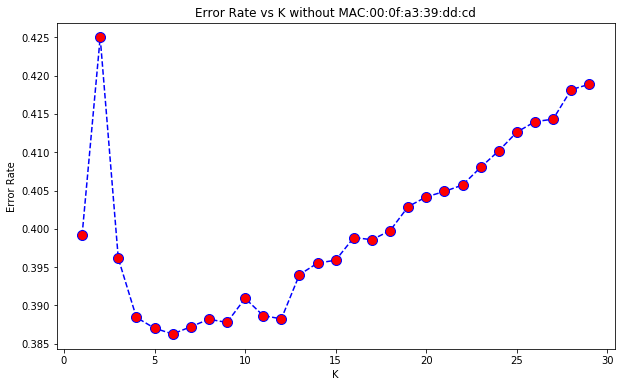

In [57]:
X_train, X_test, y_train, y_test = split_dataset(df_pruned_train,
                                                 exclude_mac='00:0f:a3:39:dd:cd_sig')

errors = compute_k_values(X_train, y_train, X_test, y_test, num_k=num_k)
plot_elbow(errors, 'Error Rate vs K without MAC:00:0f:a3:39:dd:cd', num_k=num_k)

### Error Rate vs K without MAC: 00:0f:a3:39:e1:c0

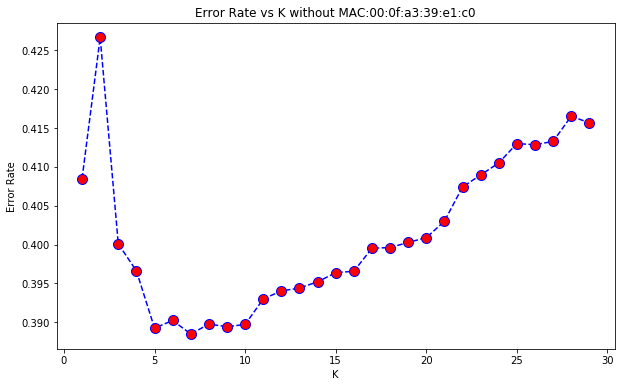

In [58]:
X_train, X_test, y_train, y_test = split_dataset(df_pruned_train,
                                                 exclude_mac='00:0f:a3:39:e1:c0_sig')

errors = compute_k_values(X_train, y_train, X_test, y_test, num_k=num_k)
plot_elbow(errors, 'Error Rate vs K without MAC:00:0f:a3:39:e1:c0', num_k=num_k)

### Error Rate vs K with all MACs

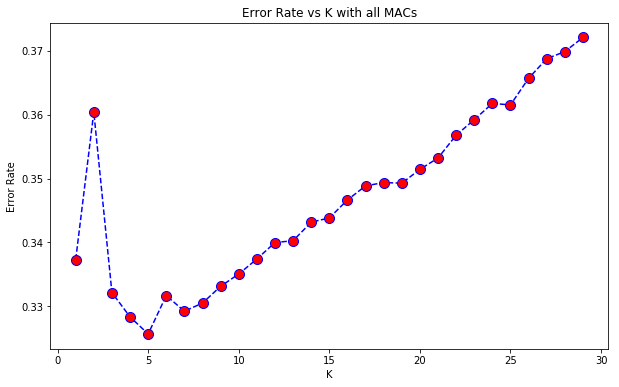

In [59]:
#df for modeling, mac that you want to exclude
X_train, X_test, y_train, y_test = split_dataset(df_pruned_train)

errors = compute_k_values(X_train, y_train, X_test, y_test, num_k=num_k)
plot_elbow(errors, 'Error Rate vs K with all MACs', num_k=num_k)

<a href="#top">Back to Top</a>
## Selecting K Value

The team has decided to use 5 as the K value for analysis.

<a id="knnanalysis"></a>
# Analysis of Selected MAC addresses - Uniform Method

The team has read in the data, prepared the data, and selected best K value to move forward with KNN Analysis.  The analysis is done three times.  This modeling is done with 'uniform' method, which weighs the values equally.
* Analysis without MAC 00:0f:a3:39:e1:c0 (6 MACs used)
* Analysis without MAC 00:0f:a3:39:dd:cd (6 MACs used)
* Analysis with both MACs (7 MACs used)

To score each model we use the Root Mean Square Error (RMSE).

### Assign K Value

In [60]:
k = 5

## Analysis without MAC 00:0f:a3:39:dd:cd

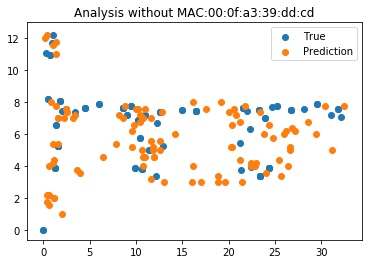

RMSE without MAC cd: 2.29


In [61]:
# Individual features & removing the MAC address not analyazing
drop_cols = label_cols + ['00:0f:a3:39:dd:cd_sig', 'pos']
X_train_mac_wthot_cd = df_pruned_train.drop(drop_cols, axis=1).values
X_test_mac_wthot_cd = df_pruned_test.drop(drop_cols, axis=1).values
#X_mac_c0.shape

error_without_cd = analyze(X_train_mac_wthot_cd, X_test_mac_wthot_cd
                           ,y_pruned_train, y_pruned_test, title='Analysis without MAC:00:0f:a3:39:dd:cd')
print('RMSE without MAC cd:', round(error_without_cd, 2))

## Analysis without MAC 00:0f:a3:39:e1:c0

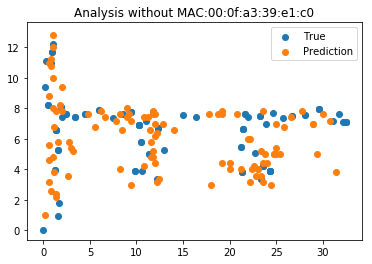

RMSE without MAC cd: 2.21


In [62]:
# Individual features & removing the MAC address not analyazing
drop_cols = label_cols + ['00:0f:a3:39:e1:c0_sig', 'pos']
X_train_mac_wthot_c0 = df_pruned_train.drop(drop_cols, axis=1).values
X_test_mac_wthot_c0 = df_pruned_test.drop(drop_cols, axis=1).values
#X_mac_cd.shape

error_without_c0 = analyze(X_train_mac_wthot_c0, X_test_mac_wthot_c0
                           ,y_pruned_train, y_pruned_test, title='Analysis without MAC:00:0f:a3:39:e1:c0')
print('RMSE without MAC cd:', round(error_without_c0, 2))

## Analysis on combined  MAC addresses data

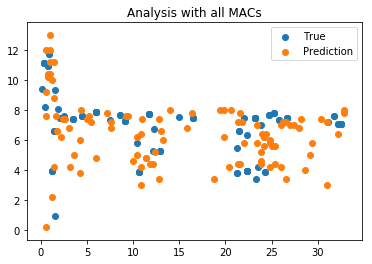

RMSE with all MACs: 2.14


In [63]:
# Combined MAC features for analysis
drop_cols = label_cols + ['pos']
X_train = df_pruned_train.drop(drop_cols, axis=1).values
X_test = df_pruned_test.drop(drop_cols, axis=1).values
#X.shape

error_comb = analyze(X_train, X_test, y_pruned_train, y_pruned_test, title='Analysis with all MACs')
print('RMSE with all MACs:', round(error_comb, 2))

# Comparison of Analysis using RMSE

In [64]:
print('RMSE without MAC cd:', round(error_without_cd, 2))
print('RMSE without MAC c0:', round(error_without_c0, 2))
print('RMSE with all MACs:', round(error_comb, 2))

RMSE without MAC cd: 2.29
RMSE without MAC c0: 2.21
RMSE with all MACs: 2.14


# Summary of KNN Uniform Method

Javier is filling in



<a href="#top">Back to Top</a>
<a id="KNNweight"></a>
# KNN Weighted Alternative

The team considered that not all points are equal and thus shouldn't be treat as such.  The performed the same analysis using the weighted method.  We calculated the weights and used this for modeling.  The same K value was used as before.

## Assign Variables

In [65]:
k = 5

## Analysis without MAC 00:0f:a3:39:dd:cd

Weights range: (9.924685311421794e-13, 0.12499982566620331)
Weighted RMSE: 2.2876516050925515


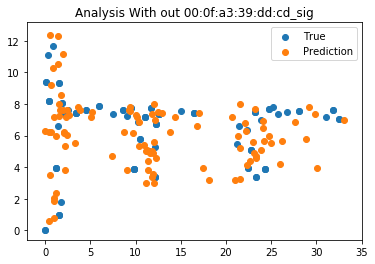

In [66]:
exc_mac = '00:0f:a3:39:dd:cd_sig'

drop_cols = label_cols + [exc_mac, 'pos']
X_train_mac_wthot_cd = df_pruned_train.drop(drop_cols, axis=1).values
X_test_mac_wthot_cd = df_pruned_test.drop(drop_cols, axis=1).values

rmse_wgt_cd = evaluate_weighted_knn(X_train_mac_wthot_cd, X_test_mac_wthot_cd, y_pruned_train, y_pruned_test,
                                    k, title='Analysis With out '+exc_mac)

## Analysis without MAC 00:0f:a3:39:e1:c0

Weights range: (2.554813145055e-12, 0.33333214084591883)
Weighted RMSE: 2.2153922739252563


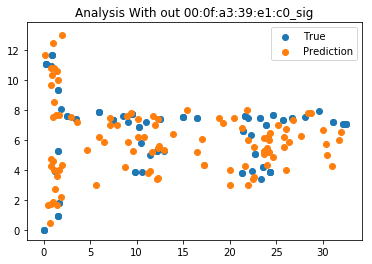

In [67]:
exc_mac = '00:0f:a3:39:e1:c0_sig'

drop_cols = label_cols + [exc_mac, 'pos']
X_train_mac_wthot_c0 = df_pruned_train.drop(drop_cols, axis=1).values
X_test_mac_wthot_c0 = df_pruned_test.drop(drop_cols, axis=1).values

rmse_wgt_c0 = evaluate_weighted_knn(X_train_mac_wthot_c0, X_test_mac_wthot_c0, y_pruned_train, y_pruned_test,
                                    k, title='Analysis With out '+exc_mac)

## Analysis on combined MAC addresses data

Weights range: (8.590306226980132e-07, 0.00011872039393892686)
Weighted RMSE: 2.13835952619405


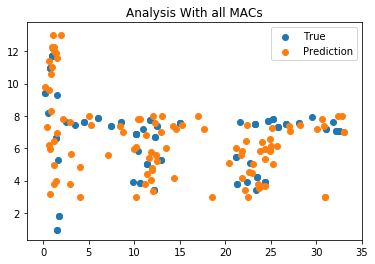

In [68]:
drop_cols = label_cols + ['pos']
X_train = df_pruned_train.drop(drop_cols, axis=1).values
X_test = df_pruned_test.drop(drop_cols, axis=1).values

rmse_wgt_comb = evaluate_weighted_knn(X_train, X_test, y_pruned_train, y_pruned_test,
                                    k, title='Analysis With all MACs')


# Summary of RMSE for Weighted Analysis

In [69]:
report(rmse_wgt_c0, '00:0f:a3:39:e1:c0')
report(rmse_wgt_cd, '00:0f:a3:39:dd:cd')
report(rmse_wgt_comb, 'Both')

RMSE for 00:0f:a3:39:e1:c0: 2.22
Weights range for 00:0f:a3:39:e1:c0: (2.554813145055e-12, 0.33333214084591883)

RMSE for 00:0f:a3:39:dd:cd: 2.29
Weights range for 00:0f:a3:39:dd:cd: (9.924685311421794e-13, 0.12499982566620331)

RMSE for Both: 2.14
Weights range for Both: (8.590306226980132e-07, 0.00011872039393892686)



<a href="#top">Back to Top</a>
<a id="online_offline"></a>
# Find NN from Online to Offline

In [70]:
#Assign K value, you want the k nearest neighbors
k = 10

In [71]:
#gather columns to use
select_cols = sig_cols + ['degree'] #, 'pos_x', 'pos_y'

# Create online and offline data frame for NN
df_offline = df_orig_offline[select_cols]
df_online = df_orig_online[select_cols]

#Group the data by degree
offline_grps = df_offline.groupby('degree').groups
online_grps = df_online.groupby('degree').groups

In [72]:
#Heavy lifter to pull the calculations between offline and online
all_results = []

for on_deg, on_indices in online_grps.items():
    # Get the matching indices in the offline, by degree
    off_indices = offline_grps.get(on_deg)
       
    # If any exist
    if off_indices is not None:
        # Get the subset of the online by matching indices
        on_grp = df_online.iloc[on_indices].dropna()
        on_grp.drop('degree', axis=1, inplace=True)
        
        # Get the subset of the offline by matching indices
        off_grp = df_offline.iloc[off_indices].dropna()
        off_grp.drop('degree', axis=1, inplace=True)
        
        nn = NearestNeighbors(k)
        nn.fit(off_grp.values)
        
        nn_distances, nn_indices = nn.kneighbors(on_grp.values)
        
        _on_indices = on_grp.index.values[:, None]
        #print(_on_indices.shape,nn_indices.shape, nn_distances.shape)
        results = np.concatenate((_on_indices, nn_indices, nn_distances), axis=1)
        all_results.append(results)

all_results = np.concatenate(all_results)

In [73]:
#Get the columns
nn_ind_cols = ['nn_{}_offline_id'.format(i+1) for i in range(k)]
nn_dist_cols = ['nn_{}_offline_dist'.format(i+1) for i in range(k)]

#Define what columns
#really dont need the nn_dist_cols
columns = ['online_id'] + nn_ind_cols + nn_dist_cols

#create dataframe
df_results = pd.DataFrame(all_results, columns=columns)

## Results of NN

In [74]:
#show the data
df_results.head()

,online_id,nn_1_offline_id,nn_2_offline_id,nn_3_offline_id,nn_4_offline_id,nn_5_offline_id,nn_6_offline_id,nn_7_offline_id,nn_8_offline_id,nn_9_offline_id,...,nn_1_offline_dist,nn_2_offline_dist,nn_3_offline_dist,nn_4_offline_dist,nn_5_offline_dist,nn_6_offline_dist,nn_7_offline_dist,nn_8_offline_dist,nn_9_offline_dist,nn_10_offline_dist
0,5126.0,343.0,340.0,336.0,335.0,346.0,211.0,234.0,365.0,331.0,...,9.165151,10.295630,11.618950,12.369317,12.609520,13.114877,13.190906,13.228757,13.266499,13.304135
1,5127.0,343.0,340.0,231.0,242.0,336.0,346.0,234.0,211.0,335.0,...,12.409674,13.266499,13.674794,14.352700,14.387495,14.662878,14.764823,15.099669,15.132746,15.231546
2,5138.0,343.0,340.0,336.0,351.0,335.0,365.0,331.0,364.0,354.0,...,9.433981,10.148892,11.224972,11.313708,11.313708,11.661904,12.124356,12.328828,12.489996,12.767145
3,5145.0,343.0,340.0,335.0,336.0,211.0,365.0,331.0,266.0,364.0,...,9.899495,11.401754,11.618950,11.958261,12.165525,12.449900,12.649111,12.688578,12.688578,12.688578
4,5146.0,343.0,336.0,365.0,351.0,335.0,331.0,354.0,211.0,275.0,...,9.848858,10.099505,10.295630,10.488088,10.677078,10.723805,10.954451,11.090537,11.135529,11.180340


In [75]:
#stupid attempt at joining the xy positions back
#df_orig_offline.iloc[df_results['nn_1_offline_id']][['pos_x', 'pos_y']]

## Summary

Based on the results from the KNN and weighted KNN models, we find there is no significant difference in the RMSE of the models. The results appear to indicate that including and/or excluding either of the mac addresses fails to have a significant impact on the RMSe of the model. A potential explanation for this would be the substantial sample size that was utilized to train the model. Even when the mac addresses are excluded, there remains a substantial sample size which is able to cover the position grid of the data. A MAC address is essentially the physical address of a device. By removing the MAC addresses from the train data set, we were essentially removing two devices from the data set. Fortunately, it appears the remaining devices were able to maintain the integrity of the data and allow for an efficient prediction model using KNN and weighted KNN. Interestingly enough, we also found that utilizing the weighted method did not improve the RMSE of the model.
<br><br>
Like most models, KNN has its limitations. KNN is commonly referred to as a 'lazy learner' in the sense that it doesn't actually learn from historical data but instead uses it to find the 'nearest neighbor' for real-time decisions. This can become time consuming as the data sets grow since it must process all of the historical data in order to make a prediction. In addition, the simplicity of the algorithm also requires all features be normalized into an equal scale. In other words, if feature_a increases by 1 unit, then feature_b must also be able to increase by 1 unit which must be equal to the increase in feature_a. Failure to normalize the data would complicate the results produced. This creates even more problems as the dimensionality of the data set increases. With additional features comes an increase in noise. Being unable to filter out the noise, the performance of the model then begins to suffer as a result. 

# References



1. Nolan, D., Temple Lang, D. DATA SCIENCE IN R: a Case Studies Approach to Computational Reasoning and Problem Solving. CRC PRESS, 2017.

2. Ojo-Osagie, O. “Dells Just In Time Inventory Management System.” Academia.edu, www.academia.edu/23256794/Dells_Just_In_Time_Inventory_Management_system.

3. Winick, E. “Amazon's Investment in Robots Is Eliminating Human Jobs.” MIT Technology Review, 4 Dec. 2017, www.technologyreview.com/the-download/609672/amazons-investment-in-robots-is-eliminating-human-jobs/.

4. ISO Committee. “Arameters for Air Interface Communications at 860 MHz to 960 MHz General.” International Organization for Standardization, 15 Jan. 2018, www.iso.org/standard/59644.html.

5. Barker, P., et al. "Performance modelling of the IrDA infrared wireless communications protocol stack." International Journal of Communication Systems, 2000. https://aetos.it.teithe.gr/~vitsas/publications/IntJCommSys_Peter.pdf

6. Boulos, Maged N Kamel, and Geoff Berry. “Real-Time Locating Systems (RTLS) in Healthcare: a Condensed Primer.” International Journal of Health Geographics, BioMed Central, 28 June 2012, www.ncbi.nlm.nih.gov/pmc/articles/PMC3408320/.

7. Madigan, D. et al. "Location Estimation in Wireless Networks: A Bayesian Approach." Rutgers University and Avaya Labs, 2006. http://dimacs.rutgers.edu/Research/MMS/PAPERS/wireless.ps.

8. Tarrío, P., et al. "Weighted Least Squares Techniques for Improved Received Signal Strength Based Localization." Sensors, 2011. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3231493/

9. Swedberg, C. “Toronto General Hospital Uses RTLS to Reduce Infection Transmission.” RFID Journal, 28 Feb. 2012, www.rfidjournal.com/articles/view?9266.

10. Chung, Won. “RTLS and Livestock Management System.” Google Patents, Google, 10 Sept. 2010, patents.google.com/patent/US20120065483A1/en.

11. Hidalgo, Jeff. “Raytheon Missile Facility Modernized by Advanced Technologies.” Raytheon Company: Technology Today , 2015, www.raytheon.com/news/technology_today/2015_i1/facilitymod.html.

12. Ding, Bin, et al. “Application of RTLS in Warehouse Management Based on RFID and Wi-Fi.” IEEE Xplore, 12 Oct. 2008, ieeexplore.ieee.org/abstract/document/4679157/.

13. Ong, Thuy. “Amazon Patents Wristbands That Track Warehouse Employees' Hands in Real Time.” The Verge, The Verge, 1 Feb. 2018, www.theverge.com/2018/2/1/16958918/amazon-patents-trackable-wristband-warehouse-employees.

14. Yi, Xun; Paulet, Russel; Bertino, Elisa; Varadharajan, Vijay. "Practical *k*-nearest Neighbor Queries with Location Privacy" (2014). Cyver Center Publications.  Paper 592.  Retrieved from http://dx.doi.org/10.1109/ICDE.2014.6816688.

15. Hudson, Steve. “How Retailers Can Extract Value From Location Data.” RFID Journal, 11 Jan. 2016, www.rfidjournal.com/articles/view?13922.

16. Bridges, Holly. “Patient Room 2020 Is on Its Way. More Calming, Connected Care.” Innovatemedtec, 19 May 2015, innovatemedtec.com/content/patient-room-2020-is-on-its-way-more-calming-connected-care.


<a href="#top">Back to Top</a>
## Cross checking with the standard Sklearn implementation  - Probably dont need anymore